In [ ]:
# Bibliotecas

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/preco_reais.xlsx")
df1.tail()

,dia,mês,ano,valor
496,12,5,2019,185.082191
497,13,5,2019,187.284509
498,14,5,2019,188.969031
499,15,5,2019,186.527867
500,16,5,2019,183.498871


In [ ]:
import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='1/1/2018', end='16/05/2019', freq='D')
df1.index=index_dates1

In [ ]:
t=8*np.sin(range(0,len(df1.valor)))

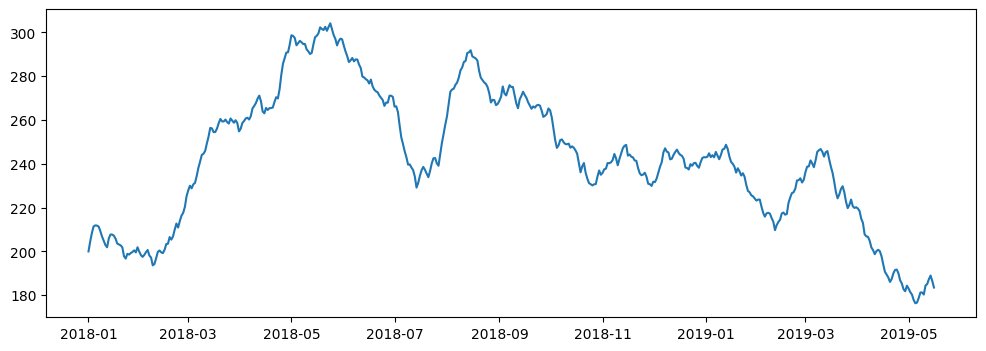

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df1.index, df1.valor)

plt.show()

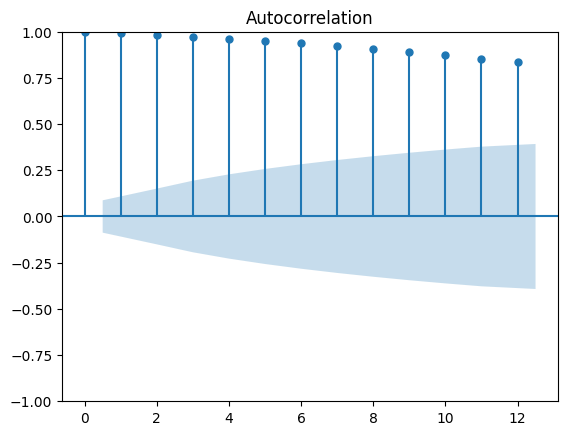

In [ ]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
x=plot_acf(df1.valor, lags=12)

In [ ]:
df1["valor"].diff()

2018-01-01         NaN
2018-01-02    4.491204
2018-01-03    3.877135
2018-01-04    3.044315
2018-01-05    0.458572
                ...   
2019-05-12    0.676130
2019-05-13    2.202318
2019-05-14    1.684522
2019-05-15   -2.441164
2019-05-16   -3.028995
Freq: D, Name: valor, Length: 501, dtype: float64

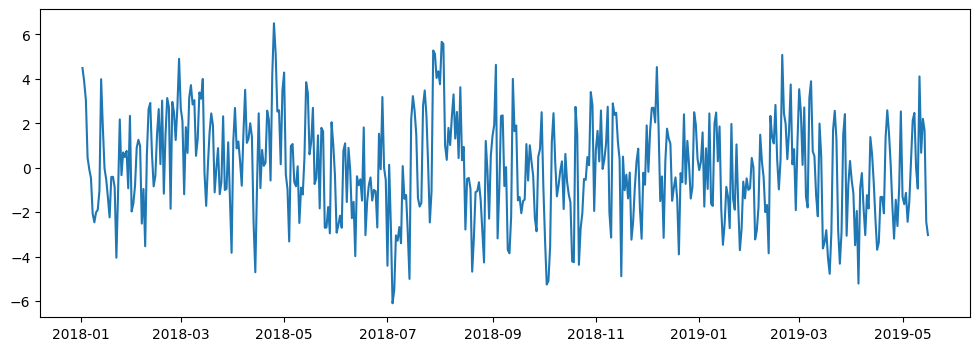

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df1.index, df1.valor.diff())

plt.show()

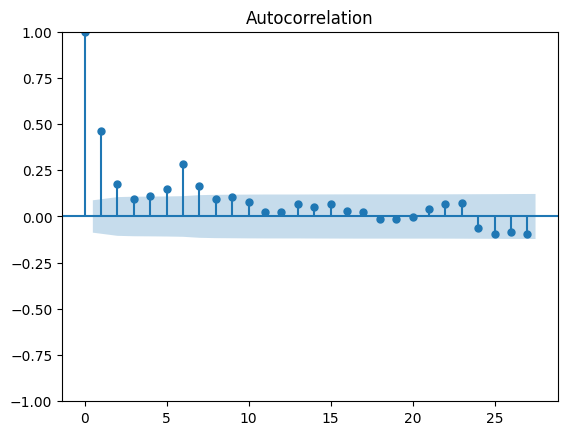

In [ ]:
# Acf série original
x=plot_acf(df1.valor.diff().dropna())

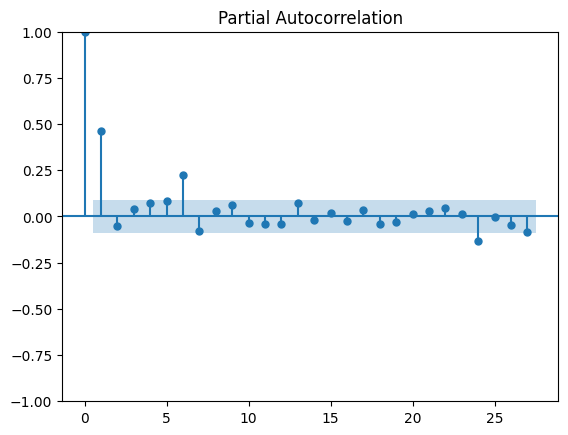

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
x=plot_pacf(df1.valor.diff().dropna());

In [ ]:
# Create Training and Test

train = df1.valor[:(len(df1)-30)]
test = df1.valor[(len(df1)-30):]


In [ ]:
train

2018-01-01    200.000000
2018-01-02    204.491204
2018-01-03    208.368338
2018-01-04    211.412653
2018-01-05    211.871225
                 ...    
2019-04-12    200.118323
2019-04-13    200.746422
2019-04-14    200.089640
2019-04-15    197.784432
2019-04-16    194.093245
Freq: D, Name: valor, Length: 471, dtype: float64

In [ ]:
# Ajustando o modelo ARIMA

model=ARIMA(train, order=(6, 1, 0))
print(model.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                  valor   No. Observations:                  471
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -977.020
Date:                Mon, 06 Nov 2023   AIC                           1968.041
Time:                        22:58:17   BIC                           1997.110
Sample:                    01-01-2018   HQIC                          1979.477
                         - 04-16-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4582      0.046     10.037      0.000       0.369       0.548
ar.L2         -0.0716      0.054     -1.333      0.182      -0.177       0.034
ar.L3         -0.0005      0.051     -0.010      0.9

In [ ]:
# Resíduos
residuos=model.fit().resid[1:]
residuos

2018-01-02    4.490719
2018-01-03    1.772827
2018-01-04    1.349581
2018-01-05   -0.970751
2018-01-06   -0.524982
                ...   
2019-04-12    2.458948
2019-04-13    0.085060
2019-04-14   -0.407574
2019-04-15   -1.159986
2019-04-16   -2.527774
Freq: D, Length: 470, dtype: float64

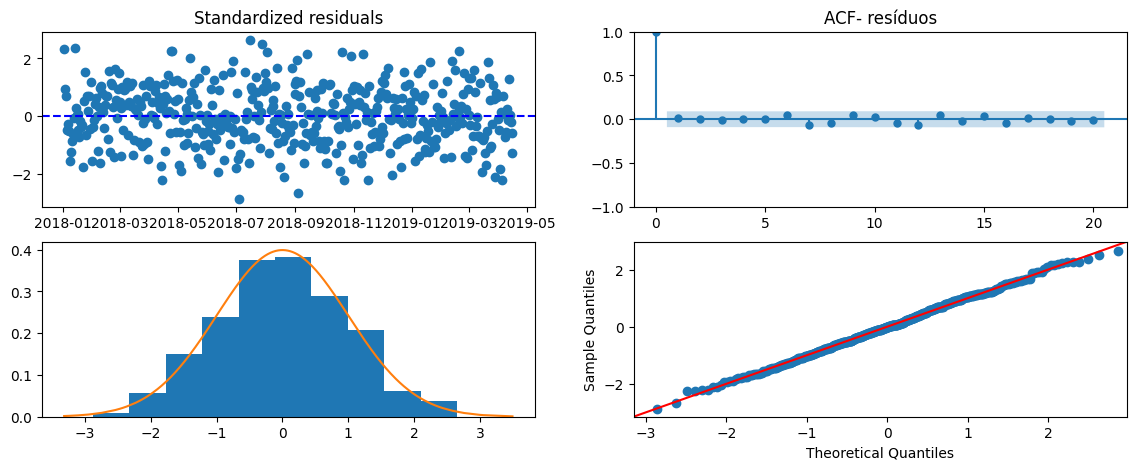

In [ ]:
#@markdown Análise de resíduos

# Resíduos
res=model.fit().resid[1:]
res_standard=(res-res.mean())/np.sqrt(res.var())
ts=df1

# Gráficos do ajuste

import scipy.stats as stats
import statsmodels.api as sm

train_size=len(train)

fig,axs = plt.subplots(2, 2,figsize=(14,5))

axs[0,0].scatter(ts.index[1:train_size], res_standard[0:train_size])
axs[0,0].axhline(y=0, color='b', linestyle='--')
axs[0,0].set_title('Standardized residuals')

x=plot_acf(res, lags=20, ax=axs[0,1], title="ACF- resíduos");

axs[1,0].hist(res_standard[1:train_size], density=True);
x=np.sort(np.random.normal(0, 1, 1000))
axs[1,0].plot(x, stats.norm.pdf(x, 0, 1))
x1=sm.qqplot(res_standard[1:train_size], line ='45', ax=axs[1,1])

In [ ]:
model.fit().get_forecast(30).predicted_mean

2019-04-17    192.157298
2019-04-18    191.797813
2019-04-19    191.776976
2019-04-20    191.441365
2019-04-21    190.702649
2019-04-22    189.551108
2019-04-23    188.635189
2019-04-24    188.193067
2019-04-25    188.009003
2019-04-26    187.816926
2019-04-27    187.533761
2019-04-28    187.140942
2019-04-29    186.766421
2019-04-30    186.511781
2019-05-01    186.364480
2019-05-02    186.250415
2019-05-03    186.126293
2019-05-04    185.977488
2019-05-05    185.827053
2019-05-06    185.705361
2019-05-07    185.620406
2019-05-08    185.556454
2019-05-09    185.497558
2019-05-10    185.435723
2019-05-11    185.373673
2019-05-12    185.319027
2019-05-13    185.276187
2019-05-14    185.242776
2019-05-15    185.214051
2019-05-16    185.186618
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
# previsões
h=30

In [ ]:
#@markdown Previsões

#forecast h=12
forecast = model.fit().get_forecast(h)
forecast.predicted_mean

# Previsões com intervalos de confiança de 95%
fc_series = pd.Series(forecast.predicted_mean, index=test.index)
lower_series = pd.Series(forecast.conf_int(alpha = 0.05)["lower valor"], index=test.index)
upper_series = pd.Series(forecast.conf_int(alpha = 0.05)["upper valor"], index=test.index)

df_prev=pd.DataFrame({"Previsões":fc_series,
              "Limite Inferior IC 95%":lower_series,
              "Limite Superior IC 95%":upper_series})
df_prev

,Previsões,Limite Inferior IC 95%,Limite Superior IC 95%
2019-04-17,192.157298,188.368516,195.946080
2019-04-18,191.797813,185.098795,198.496831
2019-04-19,191.776976,182.751156,200.802796
2019-04-20,191.441365,180.512273,202.370457
2019-04-21,190.702649,178.021325,203.383973
2019-04-22,189.551108,175.261877,203.840339
2019-04-23,188.635189,172.492105,204.778273
2019-04-24,188.193067,170.031076,206.355057
2019-04-25,188.009003,167.842886,208.175121
2019-04-26,187.816926,165.758205,209.875648


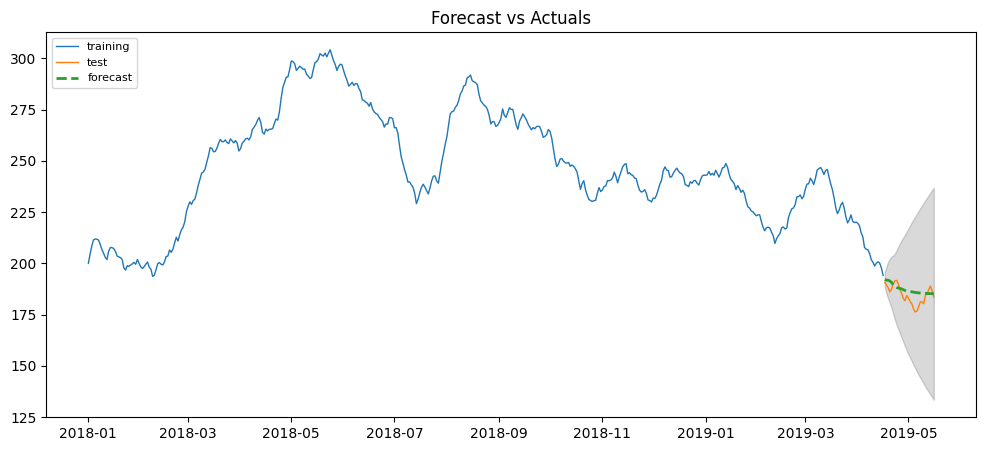

In [ ]:
#@markdown Grafico

plt.figure(figsize=(12,5))

plt.plot(train, label='training',linestyle='solid',alpha=1,lw=1)
plt.plot(test, label='test',linestyle='solid',alpha=1,lw=1)
plt.plot(fc_series, label='forecast',linestyle='dashed',alpha=1,lw=2)
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()

In [ ]:

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(forecast.predicted_mean, test.values)

{'mape': 0.02028098268467823,
 'me': 2.640193995039936,
 'mae': 3.6992542200767775,
 'mpe': 0.014700194396684688,
 'rmse': 4.403809862738354}